In [46]:
import pandas as pd
import numpy as np
from math import log2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [47]:
# TASK 1 
data =  pd.read_csv("C:/Users/user/Downloads/Task1_Data_GoComedy.data")

In [48]:
CD = pd.DataFrame(data)

In [49]:
def entropy(y):
    """Calculate the entrophy of one class serie"""
    values, counts = np.unique(y, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

In [50]:
def information_gain(y, x):
    """IG for Categoric atribute"""
    H_before = entropy(y)
    values, counts = np.unique(x, return_counts=True)
    H_after = 0
    for v, c in zip(values, counts):
        H_after += (c/len(x)) * entropy(y[x==v])
    return H_before - H_after

def best_split_numeric(y, x):
    """find best score for numerical atribute"""
    H_before = entropy(y)
    thresholds = sorted(set(x))
    best_ig, best_t = -1, None
    for i in range(len(thresholds)-1):
        t = (thresholds[i] + thresholds[i+1]) / 2
        left, right = y[x <= t], y[x > t]
        if len(left)==0 or len(right)==0:
            continue
        H_after = (len(left)/len(y))*entropy(left) + (len(right)/len(y))*entropy(right)
        ig = H_before - H_after
        if ig > best_ig:
            best_ig, best_t = ig, t
    return best_ig, best_t

In [51]:
print("Base entropy (Go):", entropy(CD["Go"]))

Base entropy (Go): 0.9957274520849255


In [52]:
ig_nat = information_gain(CD["Go"], CD["Nationality"])
print("Nationality IG:", ig_nat)

Nationality IG: 0.12303683916597119


In [54]:
for col in ["Age","Experience","Rank"]:
    ig, thr = best_split_numeric(CD["Go"], CD[col])
    print(f"{col} -> Best IG: {ig:.3f} at threshold {thr}")

Age -> Best IG: 0.073 at threshold 20.5
Experience -> Best IG: 0.073 at threshold 17.5
Rank -> Best IG: 0.661 at threshold 6.5


In [ ]:
#TASK 2
WDS = pd.read_csv("C:/Users/user/OneDrive/Documentos/winequality-red.csv")

In [ ]:
WDS["good_wine"] = (WDS["quality"] >= 5).astype(int)

In [ ]:
X = WDS.drop(columns=["quality", "good_wine"])
y = WDS["good_wine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_scaled, y_train)

In [ ]:
y_proba = model.predict_proba(X_test)[:,1] 
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

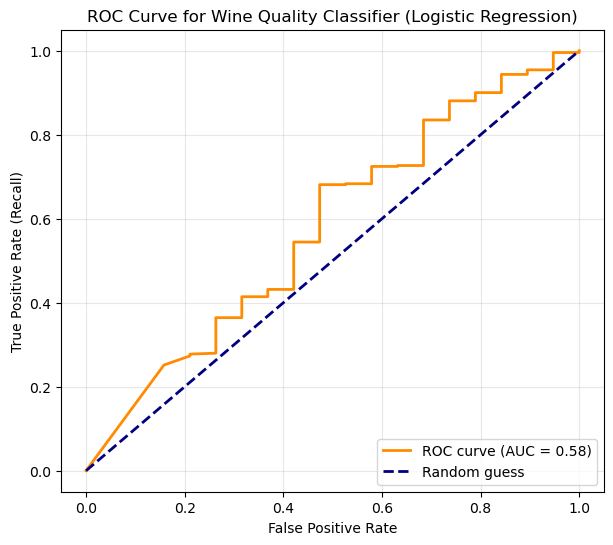

ROC-AUC Score: 0.5788902842790273


In [55]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Wine Quality Classifier (Logistic Regression)")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

In [ ]:
#TASK 3
TSD = pd.read_csv("C:/Users/user/Downloads/Task3_Data_TimeSeriesRegression.csv")

In [ ]:
TSD.head()

In [ ]:
x = TSD["t"].values.reshape(-1, 1)
Y = TSD["f(t)"].values

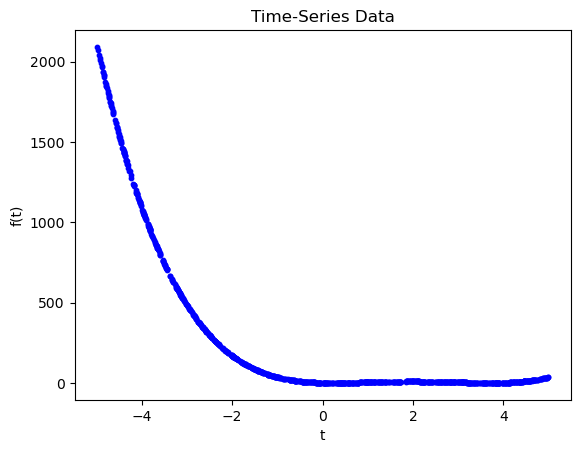

In [56]:
plt.scatter(x, Y, s=10, color='blue')
plt.title("Time-Series Data")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()

In [ ]:
Y_log = np.log(Y + 1e-6)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x, Y_log)

In [ ]:
Y_pred_log = lin_reg.predict(x)
Y_pred = np.exp(Y_pred_log)

In [ ]:
r2 = r2_score(Y, Y_pred)
print(f"R² Score (Exponential Regression): {r2:.3f}")

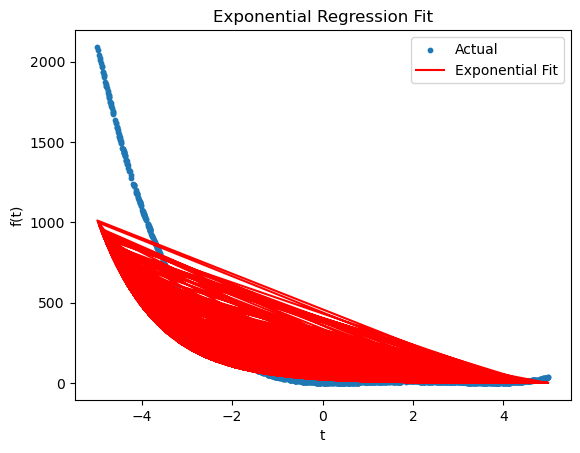

In [57]:
plt.scatter(x, Y, s=10, label="Actual")
plt.plot(x, Y_pred, color="red", label="Exponential Fit")
plt.title("Exponential Regression Fit")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.show()

In [ ]:
#Trend: The data follows an exponential decay pattern,
#starting with high values for negative x and flattening towards zero as x increases.